In [1]:
import pandas as pd 
import joblib
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import import_ipynb
import DataSetManipulation
import ParseTxtToCsv
import ModelToolkit

{'0': {'precision': 0.7142857142857143, 'recall': 0.8695652173913043, 'f1-score': 0.7843137254901961, 'support': 46.0}, '1': {'precision': 0.8285714285714286, 'recall': 0.6444444444444445, 'f1-score': 0.725, 'support': 45.0}, 'accuracy': 0.7582417582417582, 'macro avg': {'precision': 0.7714285714285715, 'recall': 0.7570048309178744, 'f1-score': 0.754656862745098, 'support': 91.0}, 'weighted avg': {'precision': 0.770800627943485, 'recall': 0.7582417582417582, 'f1-score': 0.7549827623357035, 'support': 91.0}}


In [2]:
#Training data building, testing and graphing

In [6]:
pathList = [
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 1].txt',
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 2].txt',
]
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 2].txt',
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 3].txt'
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 4].txt', 
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 5].txt', 
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 6].txt'

subPathList = []
resultList = []


In [4]:
#builds a model for each set of paths
for i, path in enumerate(pathList): 
    subPathList.append(path)
    #Saves it as a csv file named TrainingData.csv
    ModelToolkit.DatasetBuilder(subPathList)
    TrainingDataPath = 'TrainingData.csv'
    
    #creates the message to vector dictionary nessesary for cosine comparison
    df, messageToVectorDictionary = ModelToolkit.MessageToVectorDictionaryBuilder(TrainingDataPath)
    #builds the final features that the model will have for training
    df = ModelToolkit.FeatureBuilder(df, messageToVectorDictionary)

    #tests 
    results, model = ModelToolkit.TrainTest(df)
    #saves the model
    joblib.dump(model, f"trainedmodel{i}.pkl")
    #saves the results for graphing
    resultList.append(results)
    

Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 133/133 [02:42<00:00,  1.22s/it]


Final dataset done.
Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 227/227 [07:14<00:00,  1.91s/it]


Final dataset done.


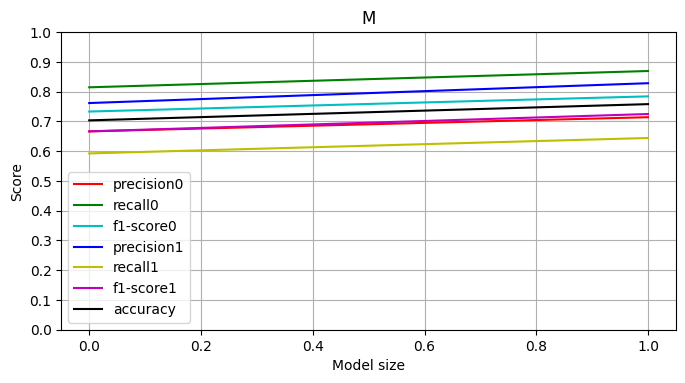

In [5]:
#graphs given results
f1ResultMatrix = ModelToolkit.MatrixBuilder(resultList, pathList)

plt = ModelToolkit.F1GraphBuilder(f1ResultMatrix, len(resultList), 'MainTest')

In [13]:
#implementation data building, testing and graphing

In [2]:
chatList = [
    'RealChatLogs.csv',
    'RealChatLogsGaymers.csv'
]

modelList = [
    'RandomForestModel1to1.pkl',
    'RandomForestModel1to2.pkl',
    'RandomForestModel1to3.pkl',
    'RandomForestModel1to4.pkl',
    'RandomForestModel1to5.pkl',
    'RandomForestModel1to6.pkl'
]

dfTestList = []

In [3]:
#builds the implementation test cases

for chat in chatList:
    cleanFile = 'ImplementationLogs.csv'
    finalFile = 'ImplementationTestLogs.csv'

    minMessages = 100
    maxMessages = 10000
    messagesPerColumn = 30

    #Edits extracted logs csv file to be compatible with existing program
    df = pd.read_csv(chat)

    df = df[['Username', 'Content']]
    df.rename(columns={
         'Username': 'User',
         'Content': 'Message'
     }, inplace = True)

    df.to_csv('ImplementationLogs.csv', index = False)

    print("Edits to fit the correct format done.")

    #Filters messages so that amount of variables changing when going for implementation stay low.
    data, keepList = DataSetManipulation.MinMaxFilter(cleanFile, minMessages, maxMessages)
    print('Filtering by min and max messages done.')

    #writes the final csv file that can be used to test the current model.
    DataSetManipulation.PairData(data, keepList, finalFile, messagesPerColumn)
    print('Final dataset done.')


    #creates the message to vector dictionary nessesary for cosine comparison
    df, messageToVectorDictionary = ModelToolkit.MessageToVectorDictionaryBuilder(finalFile)

    #Builds features for testing
    df = ModelToolkit.FeatureBuilder(df, messageToVectorDictionary)


    #appends the df for testing and graphing
    dfTestList.append(df) 


Edits to fit the correct format done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 26.59it/s]


Final dataset done.
Edits to fit the correct format done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 91.71it/s]

Final dataset done.


In [4]:
#Builds matrises
f1ResultMatrix, confusionMatrix = ModelToolkit.ImplementationResult(dfTestList, modelList)

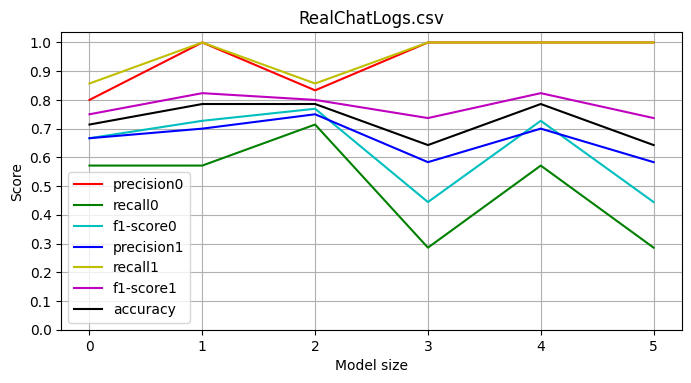

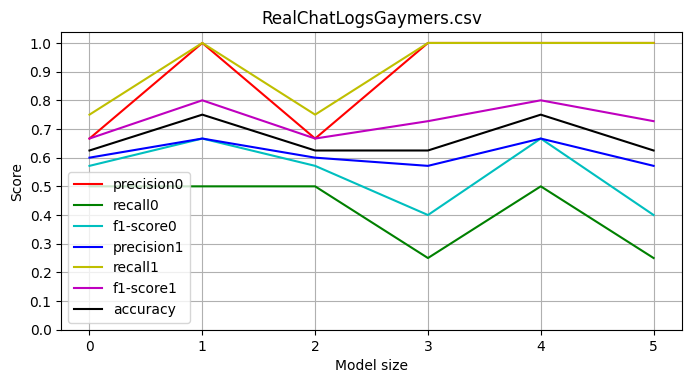

In [5]:
#graphs out results
plt = ModelToolkit.F1GraphBuilder(f1ResultMatrix, len(modelList), chatList)

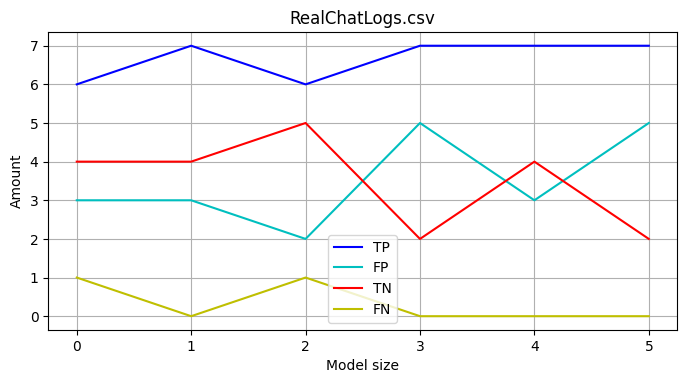

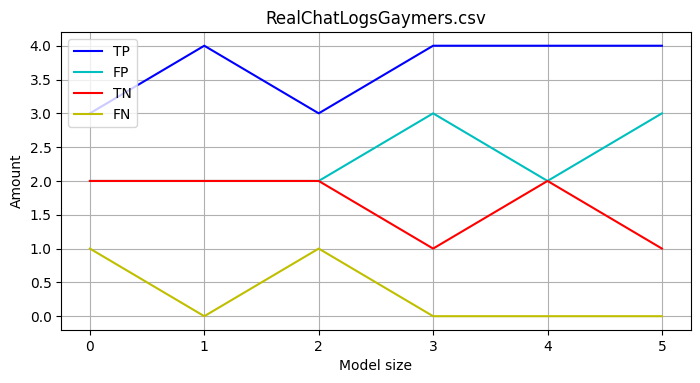

In [6]:
#graphs out confusion matrix 
plt = ModelToolkit.ConfusionMatrixGraphBuilder(confusionMatrix, len(modelList), chatList)

In [ ]:
#For running single test for implementation

cleanFile = 'ImplementationLogs.csv'
finalFile = 'ImplementationTestLogs.csv'

minMessages = 100
maxMessages = 10000
messagesPerColumn = 30

#Edits extracted logs csv file to be compatible with existing program
df = pd.read_csv('RealChatLogsGaymers.csv')

df = df[['Username', 'Content']]
df.rename(columns={
     'Username': 'User',
     'Content': 'Message'
 }, inplace = True)

df.to_csv('ImplementationLogs.csv', index = False)

print("Edits to fit the correct format done.")

#Filters messages so that amount of variables changing when going for implementation stay low.
data, keepList = DataSetManipulation.MinMaxFilter(cleanFile, minMessages, maxMessages)
print('Filtering by min and max messages done.')

#writes the final csv file that can be used to test the current model.
DataSetManipulation.PairData(data, keepList, finalFile, messagesPerColumn)
print('Final dataset done.')


#creates the message to vector dictionary nessesary for cosine comparison
df, messageToVectorDictionary = ModelToolkit.MessageToVectorDictionaryBuilder(finalFile)

#Builds features for testing
df = ModelToolkit.FeatureBuilder(df, messageToVectorDictionary)


#loads the model and runs the tests on the prediction 
model = joblib.load('RandomForestModel1to6.pkl')

X = df.drop(columns=[
    'Message1',
    'Message2', 
    'FromSameUserNum',
    'FromSameUser'
])
true = df["FromSameUserNum"]

# Make predictions
prediction = model.predict(X)

print(classification_report(true, prediction))

print("Confusion Matrix:")
print(confusion_matrix(true, prediction))